# <span style="color:darkred"><center>Tarea: Regresión y Clasificación</center></span>

## <span style="color:maroon">Presentado por</span>
Danna Lizeth Cardona Hernández, dlcardonah@unal.edu.co. Estudiante del departamento de **Estadística** de la Facultad de Ciencias, Universidad Nacional de Colombia sede Bogotá. [Info-Depto Estadística.](http://ciencias.bogota.unal.edu.co/departamentos/departamento-de-estadistica/el-departamento/)

# <span style="color:maroon">Ejercicio 1</span>
## <span style="color:maroon">Red neuronal de clasificación binaria para predecir el cáncer de seno</span>

### <span style="color:green">Introducción</span>

En esta lección construimos un modelo predictivo de regresión logística usando los datos de cáncer de la Universidad de Wisconsin.

Usaremos la funciones de activación *relu* y *sigmoid* y el regularizador *Dropout*. Adicionalmente introducimos el  modo 2 de escribir un modelo *Sequiential*.

Finalmente se construye una matriz de confusión para el problema.

### <span style="color:green"> Importa módulos</span>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Sequential
#
from tensorflow.keras.layers import Dense, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
print(tf.__version__)

2.4.1


### <span style="color:green"> Lectura de datos</span>

In [3]:
# Importing data
data = pd.read_csv('datos.cancer.csv')
del data['Unnamed: 32']
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### <span style="color:green"> Procesamiento</span>

In [4]:
x = data.iloc[:,2:].values # extrae como tensores numpy
y = data.iloc[:,1].values

### <span style="color:green"> Recodifica la variable objetivo</span>

In [5]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


### <span style="color:green">Divide los datos. Entrenamiento y test</span>

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [7]:
x_test.shape

(57, 30)

 
 ### <span style="color:green">Normaliza los datos</span>

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Crea el modelo Sequential modo 2

In [9]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=16, activation='relu', input_shape=(30,)))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1)) # 10% out in each epoc
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid'))




### <span style="color:green">Compila</span>

In [10]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()
plot_model(classifier, to_file='../Imagenes/cancer_seno.png', 
           show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for 


### <span style="color:green">Entrenamiento</span>

In [11]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 2s 94ms/step - loss: 0.6948 - accuracy: 0.5465 - val_loss: 0.5809 - val_accuracy: 0.6602
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 0.5668 - accuracy: 0.7813 - val_loss: 0.4590 - val_accuracy: 0.8932
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.4685 - accuracy: 0.8679 - val_loss: 0.3642 - val_accuracy: 0.9515
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.4010 - accuracy: 0.8874 - val_loss: 0.2908 - val_accuracy: 0.9515
Epoch 5/150
13/13 [==============================] - 0s 6ms/step - loss: 0.3362 - accuracy: 0.9226 - val_loss: 0.2349 - val_accuracy: 0.9612
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.9372 - val_loss: 0.1930 - val_accuracy: 0.9709
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 0.2063 - accuracy: 0.9562 - val_loss: 0.1606 - val_accuracy: 0.9709
Epoch 8/150



### <span style="color:green">Predicciones</span>

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0


### <span style="color:green">Matriz de confusión</span>

In [13]:
cm = confusion_matrix(y_test, y_pred)

In [14]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 98.24561403508771%


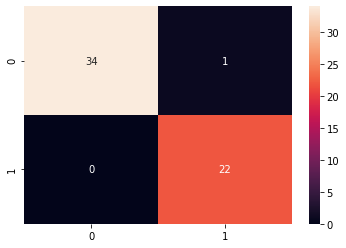

In [15]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')


### <span style="color:green">Evaluación del modelo</span>

In [16]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

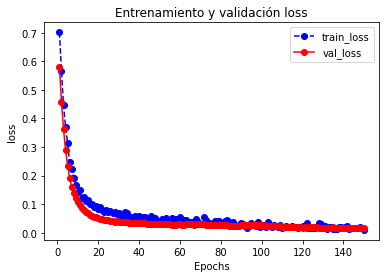

In [17]:
plot_metric(history, 'loss')


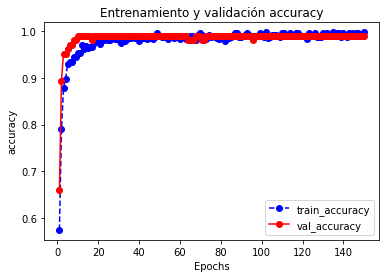

In [18]:
plot_metric(history, 'accuracy')

# <span style="color:maroon">Ejercicio 2</span>
## <span style="color:maroon">Red neuronal de regresión para predecir el precio de las viviendas</span>

### <span style="color:green">Importar librerías requeridas</span>

Se inicia TensorFlow (tf) y se cargan otras bibliotecas que necesitaremos más adelante

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.4.1


### <span style="color:green">Exploración de datos</span>

Primero, importamos un conjunto de datos de precios de la vivienda en Boston e imprimimos una descripción para poder examinar lo que hay en los datos.

In [20]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = pd.Series(data=boston.target, index=data.index) 
data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


Veamos si faltan datos:

In [22]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No faltan datos

### <span style="color:green">Procesamiento</span>

Procedemos a dividir los datos en un 70% aleatorio para el entrenamiento y el resto para las pruebas.

In [23]:
train_dataset = data.sample(frac=0.7,random_state=0)
test_dataset = data.drop(train_dataset.index)

### <span style="color:green">Inspección de los datos</span>

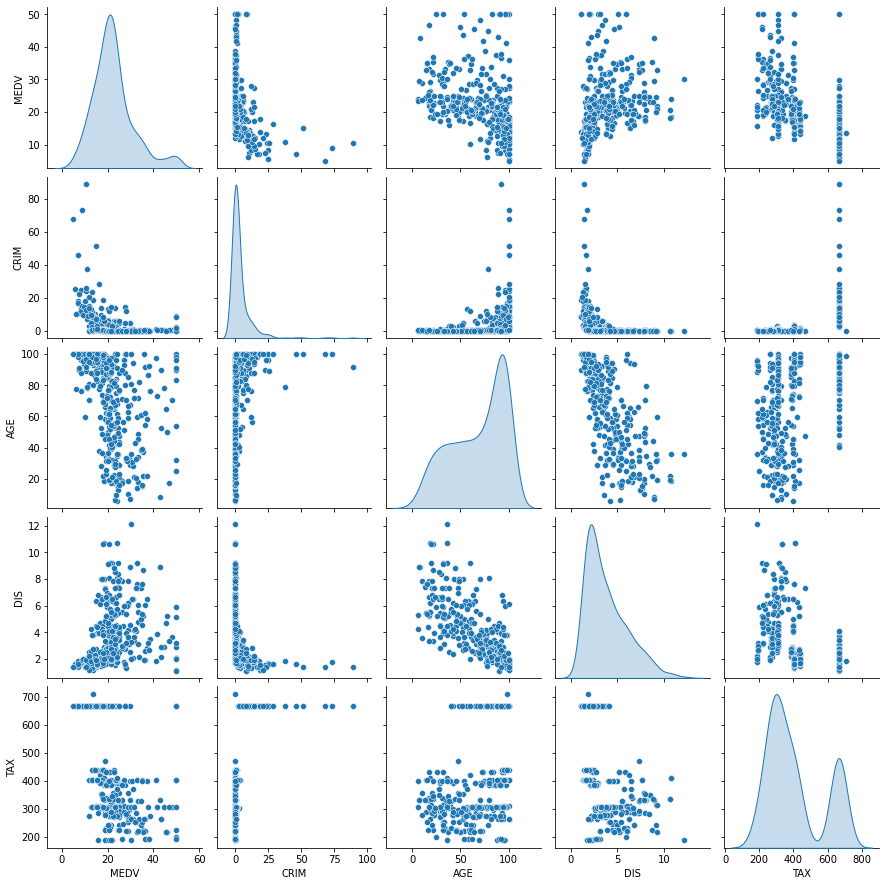

In [24]:
sns.pairplot(train_dataset[["MEDV", "CRIM","AGE","DIS","TAX"]], diag_kind="kde")

### <span style="color:green">Estadísticas generales</span>

In [25]:
train_stats = train_dataset.describe()
train_stats.pop("MEDV")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.767375,9.418497,0.00906,0.082757,0.274475,3.077295,88.9762
ZN,354.0,11.079096,23.070178,0.00000,0.000000,0.000000,12.500000,95.0000
INDUS,354.0,11.185254,6.646944,0.74000,5.860000,9.795000,18.100000,27.7400
CHAS,354.0,0.070621,0.256554,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,354.0,0.554098,0.115748,0.38500,0.453000,0.538000,0.624000,0.8710
RM,354.0,6.265791,0.699380,3.56100,5.878250,6.175000,6.605500,8.7800
AGE,354.0,68.057627,27.953167,6.00000,45.100000,76.500000,93.750000,100.0000
DIS,354.0,3.844439,2.187514,1.12960,2.073700,3.207450,5.214600,12.1265
RAD,354.0,9.440678,8.569207,1.00000,4.000000,5.000000,20.000000,24.0000
TAX,354.0,407.500000,162.296676,187.00000,287.000000,337.000000,666.000000,711.0000


### <span style="color:green">Dividir entidades de etiquetas</span>

Se separa el valor objetivo, o "etiqueta", de las características. Esta etiqueta es el valor que entrenará al modelo para predecir.

In [26]:
train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')

### <span style="color:green">Normalizar los datos</span> 

Mire nuevamente el bloque `train_stats` anterior y observe cuán diferentes son los rangos de cada característica.

Es una buena práctica normalizar las funciones que utilizan diferentes escalas y rangos.
Aunque el modelo puede converger sin la normalización de características, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

**Nota**: Aunque generamos intencionalmente estas estadísticas solo a partir del conjunto de datos de entrenamiento, estas estadísticas también se utilizarán para normalizar el conjunto de datos de prueba. Necesitamos hacer eso para proyectar el conjunto de datos de prueba en la misma distribución en la que se entrenó el modelo.

In [27]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Estos datos normalizados son los que usaremos para entrenar el modelo.

**Precaución:** Las estadísticas utilizadas para normalizar las entradas aquí (media y desviación estándar) deben aplicarse a cualquier otro dato que se alimente al modelo, junto con la codificación one-hot que hicimos anteriormente. Eso incluye el conjunto de prueba, así como los datos en vivo cuando el modelo se usa en producción.

### <span style="color:green">El modelo de red neuronal</span> 

**Construcción del modelo**

Usaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo están envueltos en una función, `build_model`, ya que crearemos un segundo modelo más adelante.

In [28]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [29]:
model = build_model();

**Inspección el modelo**

Se itiliza el método `.summary` para imprimir una descripción simple del modo

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


**Entrenamiento del modelo**

Entrene el modelo durante 1000 epochs y registre la precisión de entrenamiento y validación en el objeto `history`.

In [31]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.553338,0.530373,0.553338,39.259136,3.628232,39.259136,995
996,0.549932,0.508875,0.549932,37.249935,3.456911,37.249935,996
997,0.369769,0.413941,0.369769,40.504539,3.579015,40.504539,997
998,0.412083,0.459988,0.412083,40.523449,3.564987,40.523449,998
999,0.576848,0.599850,0.576848,46.278412,3.802371,46.278412,999


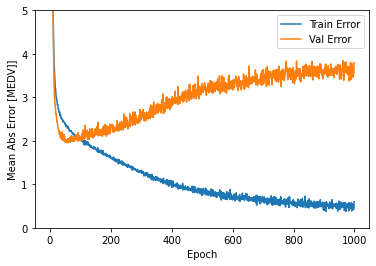

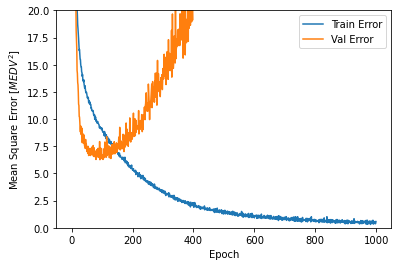

In [33]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 100 épocas. Actualicemos la llamada `model.fit` para detener automáticamente el entrenamiento cuando el puntaje de validación no mejore. Utilizaremos una * devolución de llamada de EarlyStopping * que pruebe una condición de entrenamiento para cada época. Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.

Puedes obtener más información sobre esta devolución de llamada [Aca](https://www.tensorflow.org/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping).

In [34]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


....................................................................................................
....

Volvamos a trazar el historial para, con suerte, ver que el entrenamiento del modelo se detiene antes de que las cosas empeoren para los datos de validación.

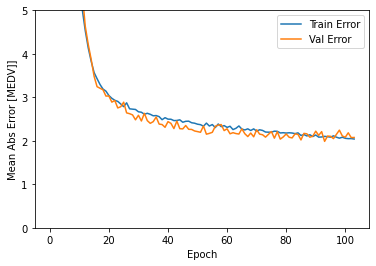

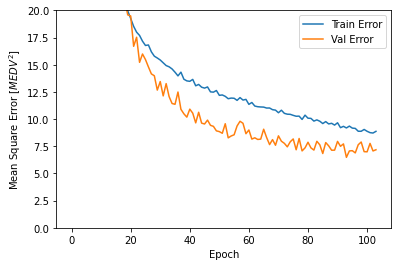

In [35]:
plot_history(history)


Veamos qué tan bien generaliza el modelo al usar el conjunto **test**, que no usamos al entrenar el modelo. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real.

In [36]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))

5/5 - 0s - loss: 11.5928 - mae: 2.3638 - mse: 11.5928
Testing set Mean Abs Error:  2.36 MEDV


### <span style="color:green"> Hacer predicciones</span> 


Finalmente, predecimos los valores de MEDV usando datos en el conjunto de pruebas (y también entrenamiento, que usaremos en el siguiente paso para calcular más métricas de error):

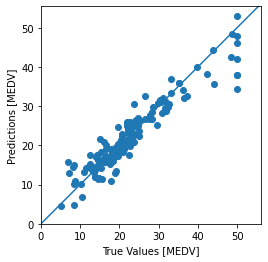

In [37]:
test_predictions = model.predict(normed_test_data).flatten()
train_predictions = model.predict(normed_train_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

### <span style="color:green"> Análisis de errores</span> 

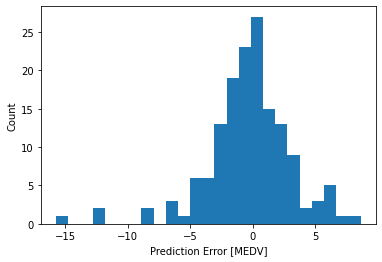

In [38]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.